In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [3]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn import metrics
from sklearn import preprocessing
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split,RandomizedSearchCV


C:\Users\HarshR-MBP_Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Read the Dataset

In [6]:
df_raw = pd.read_csv("../data/web_trust.csv",index_col=0)
print("shape:",df_raw.shape)
df_raw.head()

shape: (5691, 49)


,document_id,URL,Credibility_rating,ad_count,ad_max_size,css_definitions,page_rank,bitly_clicks,bitly_referrers,tweets,delicious_bookmarks,fb_clicks,fb_comments,fb_likes,fb_shares,fb_total,alexa_linksin,alexa_rank,commas,dots,exclamations,questions,spelling_errors,text_complexity,smog,category,JJ,NN,DT,VB,RB,num_ne,sum_ne,document_url_y,X1,X2,X3,X4,X5,X9,Total,Leik,Eijk,Tastle,Leik 3 4 6,correction,resp_HNC,Controversial,troia_label
0,2199424,http://unemployment.ohio.gov/,3.714286,0.0,0.0,106.0,6.0,9.0,5.0,22.0,23.0,0.0,10.0,12.0,62.0,84.0,68.0,6137.0,101.0,114.0,1.0,0.0,98.0,6.543833,15.903189,computer_internet,121.0,938.0,184.0,338.0,52.0,7.0,29.0,gov,0.0,1.0,2.0,2.0,2.0,0.0,7.0,0.571429,0.357143,0.613196,0.542857,0.0,2,U,3.0
1,2199427,http://www.law.cornell.edu/wex/unemployment_co...,4.428571,4.0,75000.0,1824.0,5.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9098.0,2661.0,15.0,23.0,0.0,0.0,2.0,3.813895,15.903189,business,35.0,168.0,59.0,71.0,5.0,4.0,17.0,edu,0.0,0.0,1.0,2.0,4.0,0.0,7.0,0.714286,0.714286,0.735143,0.600000,0.0,3,U,5.0
2,2547110,http://kiem-tv.com/?q=node/4395,4.000000,0.0,0.0,18.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,2.0,185.0,809409.0,19.0,18.0,0.0,1.0,26.0,3.163160,11.208143,health,18.0,100.0,23.0,52.0,11.0,5.0,20.0,com,0.0,0.0,2.0,3.0,2.0,0.0,7.0,0.714286,0.571429,0.762836,0.657143,0.0,2,U,4.0
3,2547112,http://www.sciencedaily.com/releases/2012/09/1...,4.833333,9.0,75000.0,383.0,3.0,45.0,9.0,100.0,2.0,0.0,17.0,35.0,113.0,165.0,50939.0,2549.0,19.0,20.0,0.0,0.0,15.0,3.727098,14.554593,health,39.0,156.0,46.0,67.0,21.0,8.0,24.0,com,0.0,0.0,0.0,1.0,5.0,0.0,6.0,0.916667,0.916667,0.892660,0.866667,0.0,3,U,5.0
4,2547113,http://articles.timesofindia.indiatimes.com/20...,3.888889,2.0,75000.0,599.0,3.0,3.0,3.0,7.0,0.0,0.0,1.0,3.0,3.0,7.0,1250.0,132.0,19.0,17.0,0.0,0.0,16.0,3.357533,14.554593,science_technology,32.0,112.0,39.0,57.0,8.0,6.0,10.0,com,0.0,0.0,3.0,4.0,2.0,0.0,9.0,0.722222,0.611111,0.756750,0.688889,0.0,2,U,4.0


#### Inference: There are 5,691 rows and 49 columns in the raw data set

### Check the Column datatypes

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5691 entries, 0 to 5690
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   document_id          5691 non-null   int64  
 1   URL                  5691 non-null   object 
 2   Credibility_rating   5691 non-null   float64
 3   ad_count             5642 non-null   float64
 4   ad_max_size          5642 non-null   float64
 5   css_definitions      5662 non-null   float64
 6   page_rank            5687 non-null   float64
 7   bitly_clicks         5684 non-null   float64
 8   bitly_referrers      5684 non-null   float64
 9   tweets               5687 non-null   float64
 10  delicious_bookmarks  5662 non-null   float64
 11  fb_clicks            5680 non-null   float64
 12  fb_comments          5680 non-null   float64
 13  fb_likes             5680 non-null   float64
 14  fb_shares            5680 non-null   float64
 15  fb_total             5462 non-null   f

#### Inference: Looking at the information above we can see there are null values in some of the columns , also some of the columns we don't need for URL classification.

### Delete the columns not needed for Analysis

In [8]:
#removing the obvious column not going to used in the model
cols_not_required = ['document_id','URL','Credibility_rating']


In [9]:
# make a copy of the raw data
df_main = df_raw.copy()

In [10]:
df_main.drop(cols_not_required,axis=1,inplace=True)
df_main.head()

,ad_count,ad_max_size,css_definitions,page_rank,bitly_clicks,bitly_referrers,tweets,delicious_bookmarks,fb_clicks,fb_comments,fb_likes,fb_shares,fb_total,alexa_linksin,alexa_rank,commas,dots,exclamations,questions,spelling_errors,text_complexity,smog,category,JJ,NN,DT,VB,RB,num_ne,sum_ne,document_url_y,X1,X2,X3,X4,X5,X9,Total,Leik,Eijk,Tastle,Leik 3 4 6,correction,resp_HNC,Controversial,troia_label
0,0.0,0.0,106.0,6.0,9.0,5.0,22.0,23.0,0.0,10.0,12.0,62.0,84.0,68.0,6137.0,101.0,114.0,1.0,0.0,98.0,6.543833,15.903189,computer_internet,121.0,938.0,184.0,338.0,52.0,7.0,29.0,gov,0.0,1.0,2.0,2.0,2.0,0.0,7.0,0.571429,0.357143,0.613196,0.542857,0.0,2,U,3.0
1,4.0,75000.0,1824.0,5.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9098.0,2661.0,15.0,23.0,0.0,0.0,2.0,3.813895,15.903189,business,35.0,168.0,59.0,71.0,5.0,4.0,17.0,edu,0.0,0.0,1.0,2.0,4.0,0.0,7.0,0.714286,0.714286,0.735143,0.600000,0.0,3,U,5.0
2,0.0,0.0,18.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,2.0,185.0,809409.0,19.0,18.0,0.0,1.0,26.0,3.163160,11.208143,health,18.0,100.0,23.0,52.0,11.0,5.0,20.0,com,0.0,0.0,2.0,3.0,2.0,0.0,7.0,0.714286,0.571429,0.762836,0.657143,0.0,2,U,4.0
3,9.0,75000.0,383.0,3.0,45.0,9.0,100.0,2.0,0.0,17.0,35.0,113.0,165.0,50939.0,2549.0,19.0,20.0,0.0,0.0,15.0,3.727098,14.554593,health,39.0,156.0,46.0,67.0,21.0,8.0,24.0,com,0.0,0.0,0.0,1.0,5.0,0.0,6.0,0.916667,0.916667,0.892660,0.866667,0.0,3,U,5.0
4,2.0,75000.0,599.0,3.0,3.0,3.0,7.0,0.0,0.0,1.0,3.0,3.0,7.0,1250.0,132.0,19.0,17.0,0.0,0.0,16.0,3.357533,14.554593,science_technology,32.0,112.0,39.0,57.0,8.0,6.0,10.0,com,0.0,0.0,3.0,4.0,2.0,0.0,9.0,0.722222,0.611111,0.756750,0.688889,0.0,2,U,4.0


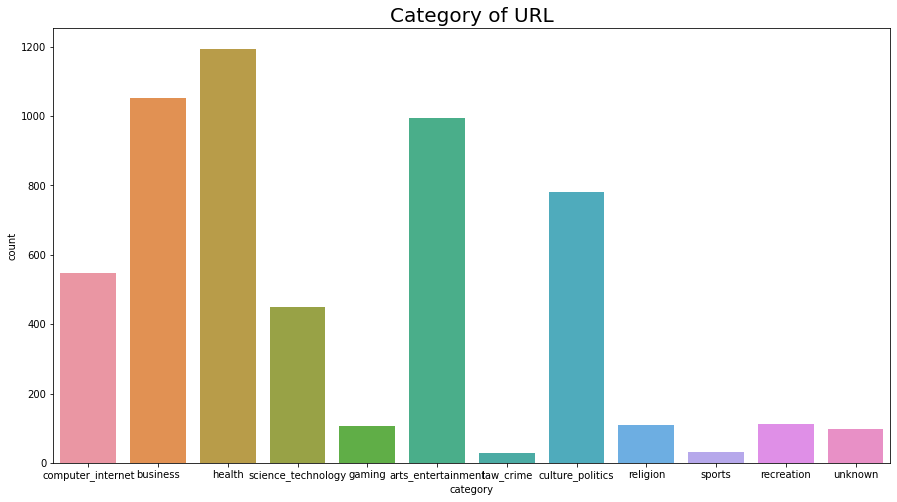

In [11]:
plt.figure(figsize = (15,8))
plt.title('Category of URL',loc='center',fontsize='20')
sns.countplot(x='category',data=df_main)
plt.show()

Inference: Plot shows most URL belong to Health,Business, entertainment genre.

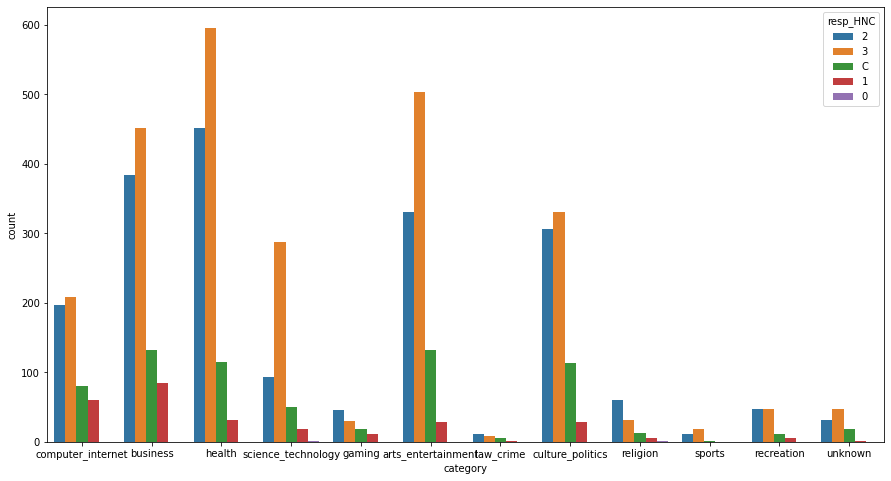

In [12]:
plt.figure(figsize = (15,8))
sns.countplot(x="category",hue='resp_HNC',data=df_main)
plt.show()

The value of 'resp_HNC' plays vital role in classification og genre.

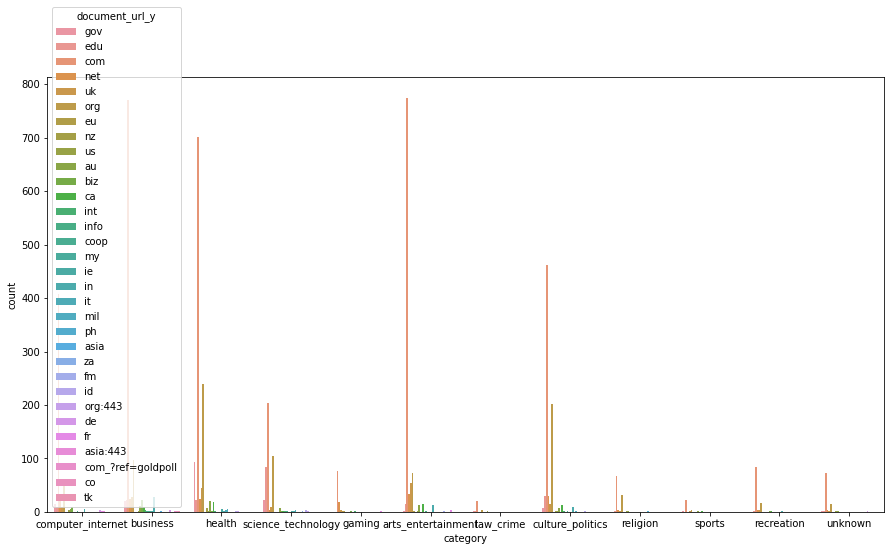

In [13]:
plt.figure(figsize = (15,8))
sns.countplot(x="category",hue='document_url_y',data=df_main)
plt.show()

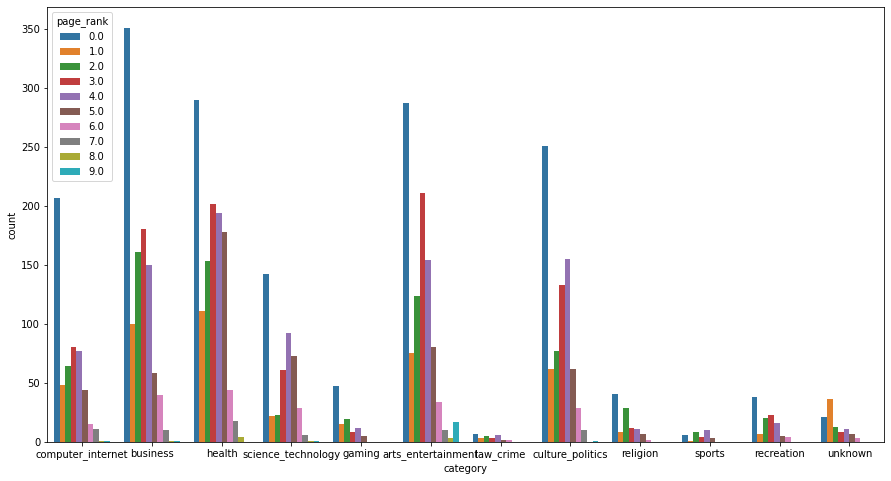

In [14]:
plt.figure(figsize = (15,8))
sns.countplot(x="category",hue='page_rank',data=df_main)
plt.show()

This shows each category has more URL with pagerank 0.0,3.0.

In [15]:
#sns.pairplot(df_main, hue="category",height=1.5)

In [16]:
df_main.columns

Index(['ad_count', 'ad_max_size', 'css_definitions', 'page_rank',
       'bitly_clicks', 'bitly_referrers', 'tweets', 'delicious_bookmarks',
       'fb_clicks', 'fb_comments', 'fb_likes', 'fb_shares', 'fb_total',
       'alexa_linksin', 'alexa_rank', 'commas', 'dots', 'exclamations',
       'questions', 'spelling_errors', 'text_complexity', 'smog', 'category',
       'JJ', 'NN', 'DT', 'VB', 'RB', 'num_ne', 'sum_ne', 'document_url_y',
       'X1', 'X2', 'X3', 'X4', 'X5', 'X9', 'Total', 'Leik', 'Eijk', 'Tastle',
       'Leik 3 4 6', 'correction', 'resp_HNC', 'Controversial', 'troia_label'],
      dtype='object')

In [17]:
df_main.select_dtypes(include=['object']).columns

Index(['category', 'document_url_y', 'resp_HNC', 'Controversial'], dtype='object')

### Handling the missing values

In [18]:
df_main.shape

(5691, 46)

In [19]:
df_main['category'].nunique()

12

In [20]:
df_main.corr().T

,ad_count,ad_max_size,css_definitions,page_rank,bitly_clicks,bitly_referrers,tweets,delicious_bookmarks,fb_clicks,fb_comments,fb_likes,fb_shares,fb_total,alexa_linksin,alexa_rank,commas,dots,exclamations,questions,spelling_errors,text_complexity,smog,JJ,NN,DT,VB,RB,num_ne,sum_ne,X1,X2,X3,X4,X5,X9,Total,Leik,Eijk,Tastle,Leik 3 4 6,correction,troia_label
ad_count,1.000000,0.749020,0.105013,0.002177,-0.006468,0.023821,-0.007034,0.054213,-0.015845,0.011743,0.000107,0.001825,0.004321,-0.022206,-0.120765,0.005466,0.011925,0.015139,0.129593,0.028105,0.148723,-0.048881,0.012432,0.031327,0.012292,0.024271,0.023779,0.074422,0.057046,-0.010956,0.040793,0.051309,0.093280,0.016556,-0.003763,0.063997,-0.018840,-0.007130,-0.020657,-0.021642,-0.006820,-0.012063
ad_max_size,0.749020,1.000000,0.244838,0.047202,-0.003862,0.063948,-0.006841,0.060149,-0.011621,0.061072,0.032196,0.019102,0.039266,0.006907,-0.140518,0.005167,0.009886,0.033158,0.147539,0.054352,0.149268,-0.060404,0.005580,0.039628,0.007884,0.017958,0.024726,0.135040,0.073724,-0.039938,0.003179,0.035286,0.099623,0.033322,-0.007585,0.061465,0.009551,0.023718,0.008765,-0.008196,0.015891,0.016314
css_definitions,0.105013,0.244838,1.000000,0.208265,-0.002206,0.081826,-0.006038,-0.018434,-0.004465,0.030900,0.019565,0.014923,0.025043,0.135604,-0.186739,0.010165,0.020274,0.044941,0.049279,0.077129,0.087659,0.007645,0.003220,0.059572,-0.003336,0.006605,0.009932,0.223471,0.096813,-0.080451,-0.053594,-0.044880,0.050766,0.130633,0.007142,0.060625,0.069225,0.073888,0.059415,0.025998,0.036872,0.087601
page_rank,0.002177,0.047202,0.208265,1.000000,0.016510,0.088968,0.014889,0.111164,0.048271,0.073455,0.052489,0.032643,0.062025,0.136177,-0.167540,0.057884,0.049852,-0.054878,0.037747,0.069657,0.102315,0.094322,0.052889,0.057166,0.042866,0.040567,0.023780,0.166469,0.110519,-0.125334,-0.119242,-0.092148,0.023859,0.194007,-0.005390,0.054669,0.121934,0.123140,0.106699,0.061925,0.064699,0.130069
bitly_clicks,-0.006468,-0.003862,-0.002206,0.016510,1.000000,0.376216,0.991622,0.010839,0.190505,0.230419,0.697212,0.155727,0.461257,0.001253,-0.009387,-0.003906,-0.004524,0.004475,-0.005176,-0.003128,-0.016038,0.003987,-0.005110,-0.003782,-0.004415,-0.004793,-0.005676,-0.016388,-0.004729,-0.002874,0.016117,-0.004181,0.003995,0.017075,0.045905,0.015113,-0.014491,-0.009382,-0.015331,-0.017748,-0.027822,0.010476
bitly_referrers,0.023821,0.063948,0.081826,0.088968,0.376216,1.000000,0.308982,0.146420,0.112416,0.475833,0.483378,0.258578,0.453748,0.056542,-0.056995,0.028043,0.018945,0.041951,0.022799,0.059269,0.033359,0.014375,0.017055,0.050265,0.010634,0.012162,0.010954,0.049057,0.055373,-0.005936,0.010923,0.009187,0.040324,0.106386,0.014003,0.077279,0.003709,0.011686,-0.004632,-0.010058,0.000552,0.033060
tweets,-0.007034,-0.006841,-0.006038,0.014889,0.991622,0.308982,1.000000,0.025829,0.192240,0.220214,0.697113,0.152945,0.457697,-0.000515,-0.006948,-0.003082,-0.003220,-0.002036,-0.003671,-0.003841,-0.014523,0.005035,-0.004044,-0.003259,-0.003364,-0.003699,-0.004318,-0.015742,-0.004643,-0.003937,0.014234,-0.007069,-0.000179,0.006492,0.045452,0.006599,-0.014880,-0.010347,-0.015098,-0.017479,-0.029942,0.006615
delicious_bookmarks,0.054213,0.060149,-0.018434,0.111164,0.010839,0.146420,0.025829,1.000000,0.132644,0.213801,0.139618,0.111456,0.163315,0.056973,-0.033778,0.035445,0.039850,0.002799,0.135336,0.030581,0.073842,-0.016253,0.035332,0.057559,0.031310,0.033031,0.026053,0.038381,0.057960,-0.004934,-0.011784,0.005856,0.029080,0.052961,-0.000534,0.038759,0.010907,0.006612,0.005848,0.004200,0.006704,0.004772
fb_clicks,-0.015845,-0.011621,-0.004465,0.048271,0.190505,0.112416,0.192240,0.132644,1.000000,0.119966,0.233498,0.263330,0.245496,0.058515,-0.009998,0.012040,0.010757,-0.002359,-0.007478,-0.000713,0.003865,-0.008932,0.015371,0.008990,0.012322,0.012139,0.008404,-0.005377,0.025476,0.014531,0.025967,0.072865,0.085443,0.123182,0.007294,0.124584,-0.004821,0.003358,-0.007277,-0.012650,-0.011202,0.037920
fb_comments,0.011743,

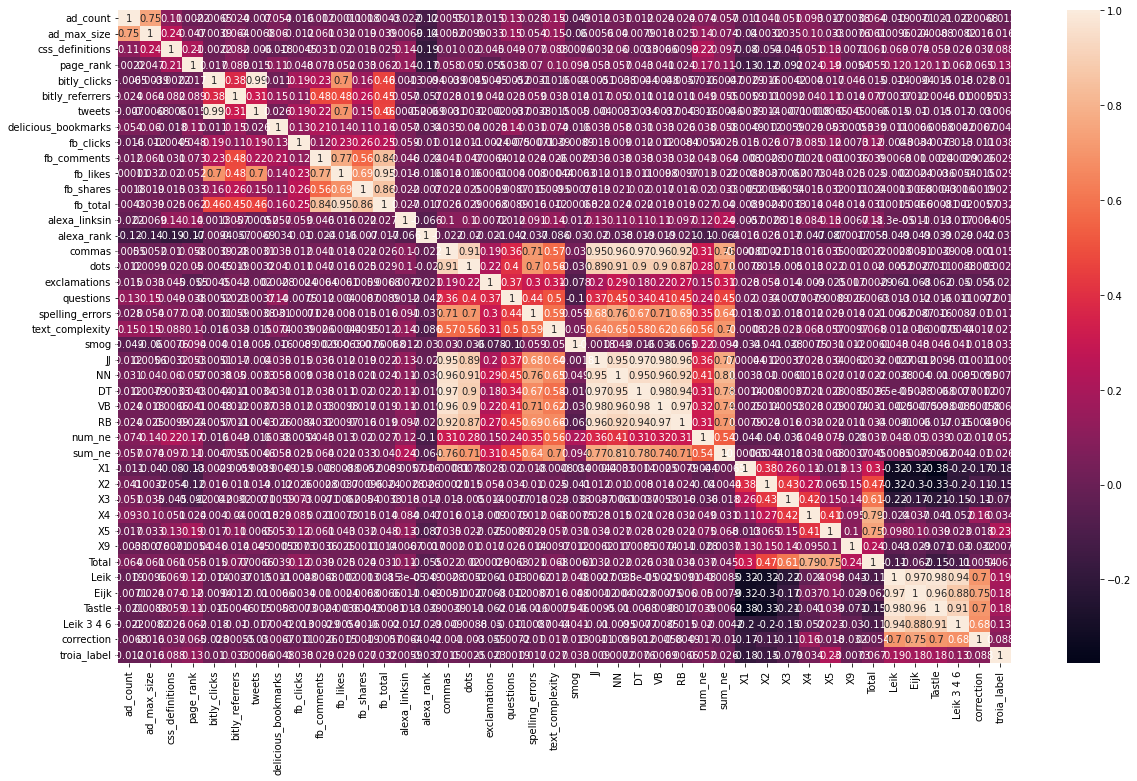

In [21]:
plt.figure(figsize=(20,12))
sns.heatmap(df_main.corr(),annot=True)
plt.show()

In [22]:
df_main.describe()

,ad_count,ad_max_size,css_definitions,page_rank,bitly_clicks,bitly_referrers,tweets,delicious_bookmarks,fb_clicks,fb_comments,fb_likes,fb_shares,fb_total,alexa_linksin,alexa_rank,commas,dots,exclamations,questions,spelling_errors,text_complexity,smog,JJ,NN,DT,VB,RB,num_ne,sum_ne,X1,X2,X3,X4,X5,X9,Total,Leik,Eijk,Tastle,Leik 3 4 6,correction,troia_label
count,5642.000000,5642.000000,5662.000000,5687.000000,5684.000000,5684.000000,5687.000000,5662.000000,5680.000000,5680.000000,5680.000000,5680.000000,5462.000000,5.680000e+03,5.680000e+03,5687.000000,5691.000000,5687.000000,5687.000000,5687.000000,5687.000000,5450.000000,5419.000000,5439.000000,5407.000000,5423.000000,5235.000000,5108.000000,5108.000000,5691.000000,5691.000000,5691.000000,5691.000000,5691.000000,5691.000000,5691.000000,5691.000000,5691.000000,5691.000000,5691.000000,5691.000000,5691.000000
mean,2.643566,34488.191776,718.795655,2.390716,273.654469,3.216749,130.251627,1.008301,1.220070,67.273063,115.997535,92.654754,286.778836,2.798695e+04,1.864592e+06,41.102690,45.853804,1.716547,2.405662,57.767364,3.930929,13.882472,58.256136,362.196360,69.696689,108.442375,30.529513,4.706343,32.995301,0.141627,0.245475,0.497628,1.049552,1.497628,0.059919,3.491829,0.755581,0.656389,0.782439,0.717170,-0.160956,3.294676
std,4.525768,50606.452621,1103.766556,2.067615,12153.556309,22.823327,7759.804697,10.724494,21.553199,1041.580994,2145.456839,1653.507501,4406.450512,1.864240e+05,4.215360e+06,138.767852,146.926136,8.771507,6.899116,154.338128,1.382503,5.208426,159.914509,963.464985,233.523205,323.019480,82.923343,2.950659,59.272067,0.501991,0.680906,0.999536,1.626668,2.169315,0.271870,4.060967,0.213940,0.384105,0.200538,0.229198,0.367523,1.467086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.129100,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,1.000000
25%,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.600000e+01,3.930000e+03,8.000000,11.000000,0.000000,0.000000,9.000000,2.994558,11.208143,14.000000,89.000000,16.000000,25.000000,6.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.642857,0.500000,0.657221,0.600000,0.000000,2.000000
50%,0.000000,0.000000,318.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.620000e+02,1.269820e+05,19.000000,23.000000,0.000000,0.000000,22.000000,3.743809,13.023867,30.000000,182.000000,34.000000,54.000000,14.000000,4.000000,16.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.750000,0.750000,0.807355,0.688889,0.000000,3.000000
75%,4.000000,75000.000000,820.750000,4.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,2.000000,4.000000,10.000000,1.944000e+03,1.436036e+06,42.000000,46.000000,1.000000,2.000000,55.000000,4.583133,15.903189,61.000000,359.000000,70.000000,113.000000,32.000000,7.000000,39.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000
max,41.000000,307200.000000,8620.000000,9.000000,908270.000000,500.000000,584357.000000,533.000000,914.000000,59969.000000,109127.000000,108955.000000,178343.000000,2.201237e+06,3.081823e+07,6620.000000,5982.000000,465.000000,195.000000,5525.000000,21.263883,97.346125,7948.000000,44553.000000,12268.000000,15122.000000,3536.000000,16.000000,1345.000000,12.000000,15.000000,15.000000,27.000000,40.000000,5.000000,51.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000


In [23]:
df_main.describe(include='O')

,category,document_url_y,resp_HNC,Controversial
count,5507,5691,5691,5691
unique,12,32,5,2
top,health,com,3,U
freq,1194,3778,2676,5556


In [24]:
df_main['category'].value_counts()

health                1194
business              1052
arts_entertainment     995
culture_politics       780
computer_internet      548
science_technology     450
recreation             113
religion               110
gaming                 106
unknown                 99
sports                  32
law_crime               28
Name: category, dtype: int64

In [25]:
df_main['document_url_y'].value_counts()

com                  3778
org                   855
gov                   209
edu                   189
net                   174
uk                    173
au                     68
ca                     61
in                     58
biz                    36
us                     14
nz                      9
int                     8
de                      7
ie                      7
fr                      6
it                      6
mil                     6
id                      6
info                    5
my                      2
coop                    2
org:443                 2
eu                      2
co                      1
com_?ref=goldpoll       1
asia:443                1
fm                      1
za                      1
asia                    1
ph                      1
tk                      1
Name: document_url_y, dtype: int64

In [26]:
df_main['resp_HNC'].value_counts()

3    2676
2    2020
C     713
1     280
0       2
Name: resp_HNC, dtype: int64

In [27]:
#getting on the popular domain as in the list below
array = ['com', 'org', 'gov', 'edu','net','uk','au','ca','in']
df2 = df_main.loc[df_main['document_url_y'].isin(array)]
df2.shape

(5565, 46)

In [28]:
df2.describe(include='O')

,category,document_url_y,resp_HNC,Controversial
count,5382,5565,5565,5565
unique,12,9,5,2
top,health,com,3,U
freq,1165,3778,2628,5434


In [29]:
df2['category'].isna().sum()

183

In [30]:
df2.isna().sum()/df2.shape[0]*100

ad_count                0.754717
ad_max_size             0.754717
css_definitions         0.503145
page_rank               0.071878
bitly_clicks            0.125786
bitly_referrers         0.125786
tweets                  0.071878
delicious_bookmarks     0.521114
fb_clicks               0.179695
fb_comments             0.179695
fb_likes                0.179695
fb_shares               0.179695
fb_total                4.097035
alexa_linksin           0.197664
alexa_rank              0.197664
commas                  0.071878
dots                    0.000000
exclamations            0.071878
questions               0.071878
spelling_errors         0.071878
text_complexity         0.071878
smog                    4.330638
category                3.288410
JJ                      4.851752
NN                      4.528302
DT                      5.031447
VB                      4.815813
RB                      8.068284
num_ne                 10.242588
sum_ne                 10.242588
document_u

In [31]:
#as there are 183 null category, we are making them as unknown category for classification
#filling all null category as 'unknown'
df2["category"].fillna("Unknown", inplace = True)

In [32]:
## Dropping the missing values.
#df2.dropna(inplace=True)
df2=df2.fillna(0)

In [33]:
## dummy encode the categorical variable.
#df1 = pd.get_dummies(df2,drop_first=True)
df2.shape

(5565, 46)

## Prepare Data

In [34]:
# Categorical features has to be converted into integer values for the model to process(one hot encoding).
y_data = df2["category"]
X_data = df2.drop(['category','ad_count', 'ad_max_size', 'css_definitions', 'page_rank',
       'bitly_clicks', 'bitly_referrers', 'tweets', 'delicious_bookmarks',
       'fb_clicks', 'fb_comments', 'fb_likes', 'fb_shares', 'fb_total',
       'alexa_linksin','num_ne', 'sum_ne','X1', 'X2', 'X3', 'X4', 'X5', 'X9', 'Total',
       'Leik', 'Eijk', 'Tastle','Leik 3 4 6', 'correction', 'resp_HNC', 'Controversial', 'troia_label'],axis=1)

# select categorical features
cat_x = X_data.select_dtypes(include=['object']).columns

In [35]:
for column in cat_x:
    print(X_data[column].value_counts())
    print('-'*50)

com    3778
org     855
gov     209
edu     189
net     174
uk      173
au       68
ca       61
in       58
Name: document_url_y, dtype: int64
--------------------------------------------------


In [36]:
X_data.head(10)

,alexa_rank,commas,dots,exclamations,questions,spelling_errors,text_complexity,smog,JJ,NN,DT,VB,RB,document_url_y
0,6137.0,101.0,114.0,1.0,0.0,98.0,6.543833,15.903189,121.0,938.0,184.0,338.0,52.0,gov
1,2661.0,15.0,23.0,0.0,0.0,2.0,3.813895,15.903189,35.0,168.0,59.0,71.0,5.0,edu
2,809409.0,19.0,18.0,0.0,1.0,26.0,3.163160,11.208143,18.0,100.0,23.0,52.0,11.0,com
3,2549.0,19.0,20.0,0.0,0.0,15.0,3.727098,14.554593,39.0,156.0,46.0,67.0,21.0,com
4,132.0,19.0,17.0,0.0,0.0,16.0,3.357533,14.554593,32.0,112.0,39.0,57.0,8.0,com
5,564474.0,112.0,157.0,0.0,4.0,76.0,6.217603,11.208143,240.0,897.0,236.0,420.0,122.0,com
6,117184.0,46.0,45.0,0.0,0.0,30.0,4.216188,14.554593,81.0,316.0,66.0,112.0,25.0,net
7,8385.0,28.0,34.0,8.0,0.0,15.0,4.345478,8.841846,44.0,198.0,29.0,85.0,37.0,com
8,52447.0,22.0,26.0,0.0,2.0,27.0,3.916086,11.208143,44.0,214.0,74.0,89.0,30.0,com
9,1347945.0,25.0,37.0,1.0,1.0,32.0,4.529745,14.554593,36.0,373.0,48.0,71.0,21.0,com


In [37]:
le_x_docURL = preprocessing.LabelEncoder()

X_data.document_url_y = le_x_docURL.fit_transform(X_data.document_url_y)
#df1=df2

In [38]:
X_data.head(10)

,alexa_rank,commas,dots,exclamations,questions,spelling_errors,text_complexity,smog,JJ,NN,DT,VB,RB,document_url_y
0,6137.0,101.0,114.0,1.0,0.0,98.0,6.543833,15.903189,121.0,938.0,184.0,338.0,52.0,4
1,2661.0,15.0,23.0,0.0,0.0,2.0,3.813895,15.903189,35.0,168.0,59.0,71.0,5.0,3
2,809409.0,19.0,18.0,0.0,1.0,26.0,3.163160,11.208143,18.0,100.0,23.0,52.0,11.0,2
3,2549.0,19.0,20.0,0.0,0.0,15.0,3.727098,14.554593,39.0,156.0,46.0,67.0,21.0,2
4,132.0,19.0,17.0,0.0,0.0,16.0,3.357533,14.554593,32.0,112.0,39.0,57.0,8.0,2
5,564474.0,112.0,157.0,0.0,4.0,76.0,6.217603,11.208143,240.0,897.0,236.0,420.0,122.0,2
6,117184.0,46.0,45.0,0.0,0.0,30.0,4.216188,14.554593,81.0,316.0,66.0,112.0,25.0,6
7,8385.0,28.0,34.0,8.0,0.0,15.0,4.345478,8.841846,44.0,198.0,29.0,85.0,37.0,2
8,52447.0,22.0,26.0,0.0,2.0,27.0,3.916086,11.208143,44.0,214.0,74.0,89.0,30.0,2
9,1347945.0,25.0,37.0,1.0,1.0,32.0,4.529745,14.554593,36.0,373.0,48.0,71.0,21.0,2


In [39]:
X_data.shape

(5565, 14)

In [40]:
y_data.dtype

dtype('O')

In [41]:
# label encode the target variable
le_y = preprocessing.LabelEncoder()
y = le_y.fit_transform(y_data)

print(X_data.shape, y.shape, Counter(y))

(5565, 14) (5565,) Counter({6: 1165, 2: 1014, 1: 988, 4: 774, 3: 530, 10: 437, 0: 183, 8: 112, 9: 107, 5: 101, 12: 96, 11: 32, 7: 26})


In [42]:
with open("../models/le_x_docURL.pkl",'wb') as file:
    pickle.dump(le_x_docURL,file)
file.close()
with open("../models/le_y.pkl",'wb') as file:
    pickle.dump(le_y,file)
file.close()

### Splitting the dataset

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y,test_size=0.3,random_state=0)

In [43]:
# performing preprocessing part
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
with open("../models/sscaler_class.pkl",'wb') as file:
    pickle.dump(sc,file)
file.close()

### Random Forest model

In [45]:
rf =RandomForestClassifier(n_estimators=250,random_state=1)
#rf =RandomForestClassifier(n_estimators=200,min_samples_leaf=15,max_depth=5,random_state=1)
rf_model = rf.fit(X_train,y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

precision = precision_score(y_test,y_test_pred, average='weighted')
recall = recall_score(y_test,y_test_pred, average='weighted')
accuracy = accuracy_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")  
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.4538922155688623
Recall: 0.4538922155688623
Precision: 0.4638652514525558
F1-score: 0.42971814032451305


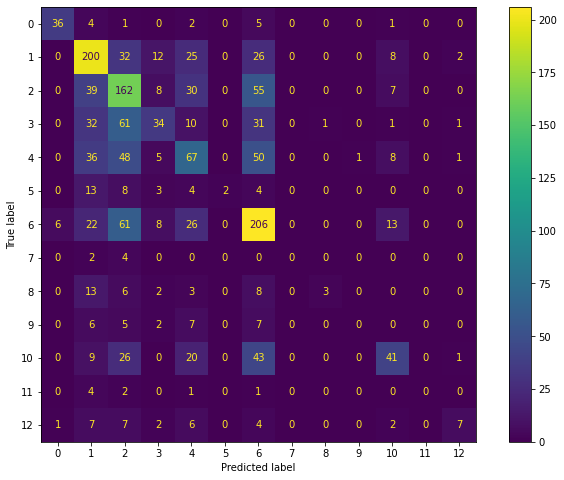

In [46]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_test_pred) # confusion matrix using PCA data
cmp = ConfusionMatrixDisplay(cm, display_labels=rf_model.classes_)
cmp.plot(ax=ax)

plt.show();

### Hyperparameter tuning - Random search

In [47]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt',None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)
rf_random.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [48]:
#rf_random.fit(X_train,y_train)
y_train_pred = rf_random.predict(X_train)
y_test_pred = rf_random.predict(X_test)

precision = precision_score(y_test,y_test_pred, average='weighted')
recall = recall_score(y_test,y_test_pred, average='weighted')
accuracy = accuracy_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")  
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.4562874251497006
Recall: 0.4562874251497006
Precision: 0.47249392549261693
F1-score: 0.43259500975293624


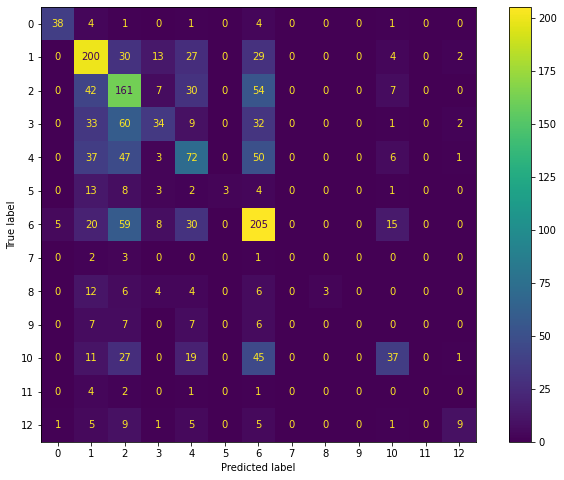

In [49]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_test_pred) # confusion matrix using PCA data
cmp = ConfusionMatrixDisplay(cm, display_labels=rf_random.classes_)
cmp.plot(ax=ax)

plt.show();

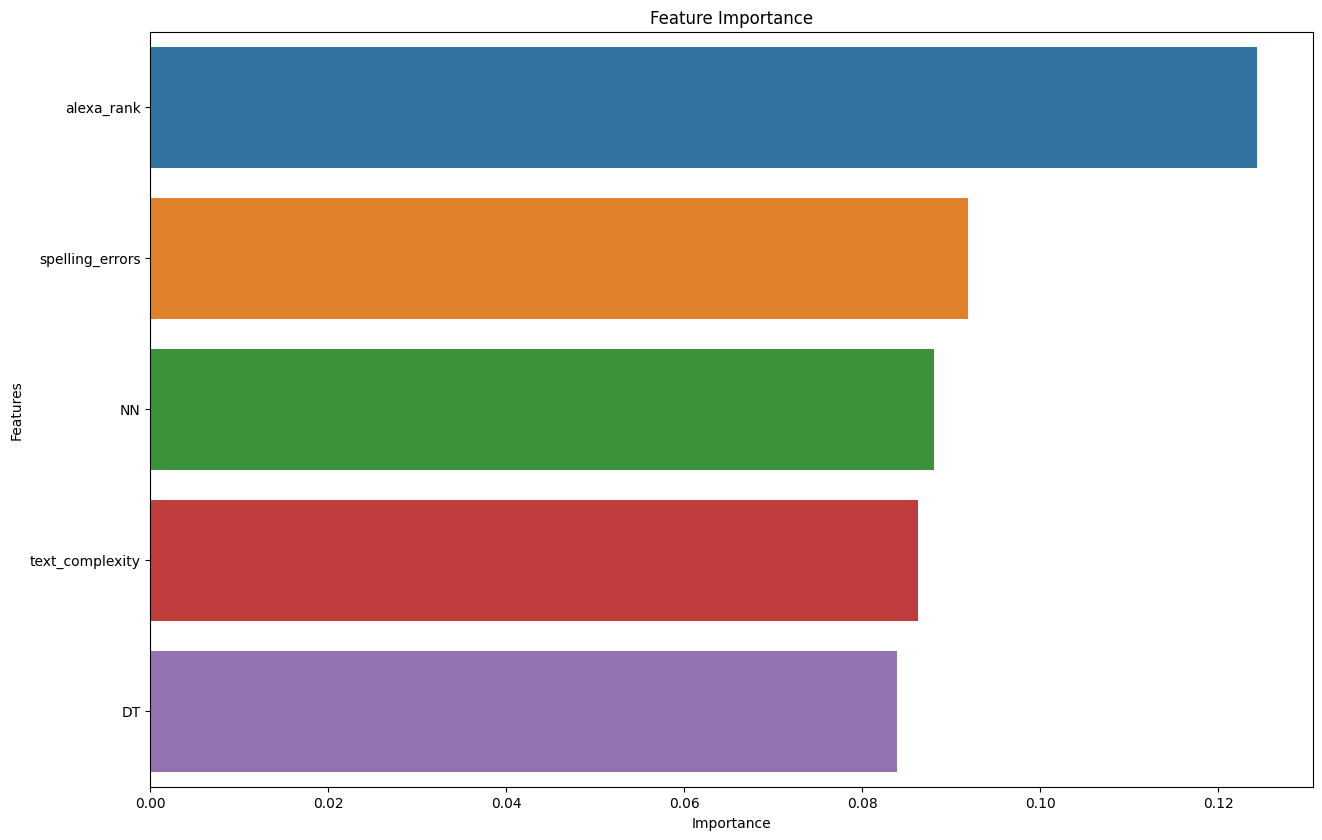

In [55]:
FI_df=pd.DataFrame({'Features': X_data.columns, 'Importance': rf_random.best_estimator_.feature_importances_})
FI_df=FI_df.sort_values(by='Importance', ascending=False).head(100)

#plot feature importance
plt.figure(figsize=(15,10),dpi=100)
sns.barplot(x=FI_df[:5].Importance,y=FI_df[:5].Features,orient = 'h').set_title('Feature Importance')
plt.savefig("../models/top5featuresClass.png")

In [51]:
rf_random.best_estimator_.feature_importances_

array([0.12442441, 0.07110554, 0.06701107, 0.03070007, 0.03712201,
       0.0918814 , 0.08626776, 0.06315707, 0.0798294 , 0.08808964,
       0.08390567, 0.07555626, 0.06256775, 0.03838196])

### Bagging Model

In [161]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(n_estimators=150,random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(n_estimators=150, random_state=1)

In [162]:
y_train_pred = bagging_estimator.predict(X_train)
y_test_pred = bagging_estimator.predict(X_test)

precision = precision_score(y_test,y_test_pred, average='weighted')
recall = recall_score(y_test,y_test_pred, average='weighted')
accuracy = accuracy_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")  
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.45149700598802395
Recall: 0.45149700598802395
Precision: 0.4585912361648985
F1-score: 0.43038780151900363


In [48]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [1,5,10,20]
# Minimum number of samples required to split a node
max_samples = [2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
bc = BaggingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
bc_random = RandomizedSearchCV(estimator = bc, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
bc_random.fit(X_train,y_train)
bc_random.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': [1, 5, 10, 20], 'max_samples': [2, 5, 10], 'bootstrap': [True, False]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.6min finished


{'n_estimators': 1400,
 'max_samples': 10,
 'max_features': 10,
 'bootstrap': True}

In [49]:
y_train_pred = bc_random.predict(X_train)
y_test_pred = bc_random.predict(X_test)

precision = precision_score(y_test,y_test_pred, average='weighted')
recall = recall_score(y_test,y_test_pred, average='weighted')
accuracy = accuracy_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")  
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.28023952095808385
Recall: 0.28023952095808385
Precision: 0.18132075813358073
F1-score: 0.2020087355943489


### XGBClassifier

In [51]:
xgb_estimator=XGBClassifier(random_state=1,use_label_encoder=False, eval_metric='logloss')
xgb_estimator.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [52]:
y_train_pred = xgb_estimator.predict(X_train)
y_test_pred = xgb_estimator.predict(X_test)

precision = precision_score(y_test,y_test_pred, average='weighted')
recall = recall_score(y_test,y_test_pred, average='weighted')
accuracy = accuracy_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")  
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.4532934131736527
Recall: 0.4532934131736527
Precision: 0.44822005892987743
F1-score: 0.43640487964591324


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of depth to consider at every split
max_depth = [1,5,10,20]
# Minimum number of tree required to split a node
num_parallel_tree = [20, 50, 100]
# delta step 
max_delta_step = [1,3,5,6]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'num_parallel_tree': num_parallel_tree,
               'max_delta_step': max_delta_step}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgb = XGBClassifier(use_label_encoder=False, booster='gbtree', eval_metric='logloss')
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
xgb_random.fit(X_train,y_train)
xgb_random.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [1, 5, 10, 20], 'num_parallel_tree': [20, 50, 100], 'max_delta_step': [1, 3, 5, 6]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [50]:
y_train_pred = xgb_random.predict(X_train)
y_test_pred = xgb_random.predict(X_test)

precision = precision_score(y_test,y_test_pred, average='weighted')
recall = recall_score(y_test,y_test_pred, average='weighted')
accuracy = accuracy_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")  
print(f"Precision: {precision}")
print(f"F1-score: {f1}")


NameError: name 'xgb_random' is not defined

### KNN Classifier

In [65]:
#trying unsupervisied learning to see if we can group the X
neighbors=range(1,13)
for n in neighbors:
    clf_knn = KNeighborsClassifier(n_neighbors=n, metric = "euclidean")
    print(clf_knn.fit(X_train, y_train))
    y_pred = clf_knn.predict(X_test)
    precision = precision_score(y_test,y_pred, average='micro')
    recall = recall_score(y_test,y_pred, average='micro')
    accuracy = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred, average='macro')
    print("Prediction for Neighbor:",n)
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")  
    print(f"Precision: {precision}")
    print(f"F1-score: {f1}")

KNeighborsClassifier(metric='euclidean', n_neighbors=1)
Prediction for Neighbor: 1
Accuracy: 0.34251497005988024
Recall: 0.34251497005988024
Precision: 0.34251497005988024
F1-score: 0.2518126246154412
KNeighborsClassifier(metric='euclidean', n_neighbors=2)
Prediction for Neighbor: 2
Accuracy: 0.3401197604790419
Recall: 0.3401197604790419
Precision: 0.3401197604790419
F1-score: 0.21431002761745258
KNeighborsClassifier(metric='euclidean', n_neighbors=3)
Prediction for Neighbor: 3
Accuracy: 0.35748502994011977
Recall: 0.35748502994011977
Precision: 0.35748502994011977
F1-score: 0.23631020871298836
KNeighborsClassifier(metric='euclidean', n_neighbors=4)
Prediction for Neighbor: 4
Accuracy: 0.34970059880239523
Recall: 0.34970059880239523
Precision: 0.34970059880239523
F1-score: 0.24105012678157697
KNeighborsClassifier(metric='euclidean')
Prediction for Neighbor: 5
Accuracy: 0.34850299401197604
Recall: 0.34850299401197604
Precision: 0.34850299401197604
F1-score: 0.2573533342811519
KNeighbors

### DecisionTreeClassifier

In [66]:
DT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
y_pred = DT.predict(X_test)
precision = precision_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.33712574850299404
Recall: 0.33712574850299404
Precision: 0.34531132097895084
F1-score: 0.3390260397644675


### AdaBoostClassifier

In [68]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [69]:
y_pred = ab_classifier.predict(X_test)
precision = precision_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.22634730538922157
Recall: 0.22634730538922157
Precision: 0.2688640107515337
F1-score: 0.22737399282065848


## Exporting the model to use by the application

In [ ]:
with open("./models/category_model.pkl",'wb') as file:
    pickle.dump(rf_random,file)
file.close()

In [50]:
with open("../models/category_model.pkl",'wb') as file:
    pickle.dump(rf_model,file)
file.close()

In [151]:
def preprocess(X):
    X=X.fillna(0)
    ## dummy encode the categorical variable.
    le_x_docURL= pickle.load(open("./models/le_x_docURL.pkl","rb"))
    X.document_url_y = le_x_docURL.transform(X.document_url_y)
    sc = pickle.load(open("./models/standardscaler.pkl","rb"))
    X= sc.transform(X)
    return X

In [152]:
feature_list = [{
        'commas':1, 'exclamations':0, 'dots':2, 'questions':1,
        'spelling_errors':104, 'text_complexity':1.937519, 'smog':3.0,
        'NN':55, 'VB':1, 'JJ':2, 'RB':0, 'DT':0, 'alexa_rank':4, 'document_url_y':"com"
    }]

In [153]:
df=pd.DataFrame(feature_list)
df

,commas,exclamations,dots,questions,spelling_errors,text_complexity,smog,NN,VB,JJ,RB,DT,alexa_rank,document_url_y
0,1,0,2,1,104,1.937519,3.0,55,1,2,0,0,4,com


In [154]:
preprocess(df)

array([[-0.44084038, -0.27064804, -0.27715981, -0.10015763, 15.1768093 ,
        -0.34333381, -0.68489334,  7.0077399 , -0.31811828, -0.33225582,
        -0.2627493 , -0.29552919, -0.27866977, -0.56276604]])

In [156]:
category_model = pickle.load(open("./models/category_model.pkl","rb"))
y_out = category_model.predict(preprocess(df))
# inverse transforming the label encoded target feature
y_out_Obj = le_y.inverse_transform(y_out)
print(y_out_Obj)

['health']
